In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!pip install -q nltk

In [ ]:
!pip install -q numpy

In [ ]:
!pip install -q pandas

In [ ]:
!pip install -q gensim

In [ ]:
!pip install -q sklearn

In [ ]:
!pip install -q matplotlib

In [205]:
!pip install -q mlxtend

In [ ]:
mlxtend

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [120]:
from google.colab import files
uploaded = files.upload()

Saving Canada_COVID19_data_M1.csv to Canada_COVID19_data_M1 (4).csv
Saving Canada_COVID19_data_M2.csv to Canada_COVID19_data_M2 (4).csv
Saving DecreaseInCOVIDAprToSepM1.csv to DecreaseInCOVIDAprToSepM1 (4).csv
Saving DecreaseInCOVIDAprToSepM2.csv to DecreaseInCOVIDAprToSepM2 (1).csv
Saving IncreaseInTweetAprToSepM1.csv to IncreaseInTweetAprToSepM1 (4).csv
Saving IncreaseInTweetAprToSepM2.csv to IncreaseInTweetAprToSepM2 (1).csv
Saving NoChangeTotalM1.csv to NoChangeTotalM1.csv
Saving NoChangeTotalM2.csv to NoChangeTotalM2 (1).csv


In [179]:
import pandas as pd
import io

modelnumber='M2'
df = pd.read_csv(io.StringIO(uploaded['Canada_COVID19_data_'+modelnumber+'.csv'].decode('utf-8')))
df['Tweet']

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
409     RT CPHOCanada This illustration adapted from ...
410     In the past week there were over 300000 new C...
411     Among people exposed to COVID19 in their home...
412     As we continue to address the impacts of COVI...
413     Want trusted up to date information on COVID1...
Name: Tweet, Length: 414, dtype: object

In [180]:

from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
from nltk.corpus import stopwords
import numpy as np 
import pandas as pd 
import io
  
from sklearn import cluster
from sklearn import metrics

df=df.dropna();

df['Tweet'] = df['Tweet'].str.lower()
corpus = df['Tweet'].to_numpy()
tweets1 = corpus[0:207]    # tweets from Nov 2019 to Apr 2020    
tweets2 = corpus[207:360]  # tweets from Apr 2020 to Sep 2020
tweets3 = corpus[360:396]  # tweets from Sep 2020 to Oct 2020
tweetcategories1 = df['category_value'].to_numpy()[0:207]
tweetcategories2 = df['category_value'].to_numpy()[207:360]
tweetcategories3 = df['category_value'].to_numpy()[360:396]

tweets1 = [nltk.word_tokenize(tweet) for tweet in tweets1]
tweets2 = [nltk.word_tokenize(tweet) for tweet in tweets2]
tweets3 = [nltk.word_tokenize(tweet) for tweet in tweets3]

for i in range(len(tweets1)):
    tweets1[i] = [word for word in tweets1[i] if word not in stopwords.words('english')]

for i in range(len(tweets2)):
    tweets2[i] = [word for word in tweets2[i] if word not in stopwords.words('english')]

for i in range(len(tweets3)):
    tweets3[i] = [word for word in tweets3[i] if word not in stopwords.words('english')]

corpus = tweets1+tweets2+tweets3

# Create word embedding model for the corpus of all tweets
model = Word2Vec(corpus, min_count=1)

def tweet_vectorizer(tweet, model):
    tweet_vec =[]
    numw = 0
    for w in tweet:
        try:
            if numw == 0:
                tweet_vec = model[w]
            else:
                tweet_vec = np.add(tweet_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(tweet_vec) / numw

X1=[]  #Vectorized tweets from Nov 2019 to Apr 2020
X2=[]  #Vectorized tweets from Apr 2020 to Sep 2020
X3=[]  #Vectorized tweets from Sep 2020 to Oct 2020

# Vectorize the tweets by using the above Word2Vec model
for tweet in tweets1:
    X1.append(tweet_vectorizer(tweet, model)) 

for tweet in tweets2:
    X2.append(tweet_vectorizer(tweet, model)) 

for tweet in tweets3:
    X3.append(tweet_vectorizer(tweet, model)) 

# Corresponding tweet labels
Y1 = [0 if y == 0 else 1 if y > 0 else 2 for y in tweetcategories1]
Y2 = [0 if y == 0 else 1 if y > 0 else 2 for y in tweetcategories2]
Y3 = [0 if y == 0 else 1 if y > 0 else 2 for y in tweetcategories3]

    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [181]:
# Tweets from datset2 for increase in COVID 
df_new = pd.read_csv('IncreaseInTweetAprToSep'+modelnumber+'.csv')
df_new["Tweet"] = df_new["Tweet"].str.lower()
tweetAprtoSept_Increase = df_new["Tweet"].to_numpy()
tweetAprtoSept_Increase= [nltk.word_tokenize(tweet) for tweet in tweetAprtoSept_Increase]
X_tweetAprtoSept_Increase=[]

for i in range(len(tweetAprtoSept_Increase)):
    tweetAprtoSept_Increase[i] = [word for word in tweetAprtoSept_Increase[i] if word not in stopwords.words('english')]
    
for tweet in tweetAprtoSept_Increase:
    X_tweetAprtoSept_Increase.append(tweet_vectorizer(tweet, model)) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [182]:
# Tweets from datset2 for decrease in COVID
df_new2 = pd.read_csv('DecreaseInCOVIDAprToSep'+modelnumber+'.csv')
df_new2["Tweet"] = df_new2["Tweet"].str.lower()
df = df_new2["Tweet"].dropna()
tweetAprtoSept_Decrease = df.to_numpy()

tweetAprtoSept_Decrease= [nltk.word_tokenize(tweet) for tweet in tweetAprtoSept_Decrease]
X_tweetAprtoSept_Decrease=[]

for i in range(len(tweetAprtoSept_Decrease)):
    tweetAprtoSept_Decrease[i] = [word for word in tweetAprtoSept_Decrease[i] if word not in stopwords.words('english')]
    
for tweet in tweetAprtoSept_Decrease:
    X_tweetAprtoSept_Decrease.append(tweet_vectorizer(tweet, model)) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [183]:
# Tweets from datset2 for no change in COVID
df_new2 = pd.read_csv('NoChangeTotal'+modelnumber+'.csv')
df_new2["Tweet"] = df_new2["Tweet"].str.lower()
df = df_new2["Tweet"].dropna()
print(df)
nochange = df.to_numpy()

nochange
nochange = [nltk.word_tokenize(tweet) for tweet in nochange if tweet != 'NaN']
len(nochange)
X_nochange=[]

for i in range(len(nochange)):
    nochange[i] = [word for word in nochange[i] if word not in stopwords.words('english')]
    
for tweet in nochange:
    X_nochange.append(tweet_vectorizer(tweet, model)) 

14      this prepardenessmonth take 20 minutes to mak...
15      prime minister justin trudeau accompanied by ...
16      rt cmhcca the firsttime home buyer incentive ...
17      prime minister justin trudeau discusses rural...
18      prime minister justin trudeau announces a new...
                             ...                        
159     read cdcmmwr report on the first cases of 201...
162     prime minister justin trudeau convened the in...
163     on 211 who announced an official name for the...
164     cdc is continually reassessing its recommenda...
166     cdcs clinical team working with state and loc...
Name: Tweet, Length: 142, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [128]:
# Clustering
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=3
clustermodel = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = clustermodel.cluster(X_train, assign_clusters=True)
print (assigned_clusters)


[0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
cluster_numbers = []
count0 = 0
count1 = 0
count2 = 0  

for i in X_dev1:
  cluster_numbers.append(clustermodel.classify_vectorspace(i))

for i in cluster_numbers:
  if(i== 0):
    count0 += 1
  if(i == 1):
    count1 += 1
  if(i == 2):
    count2 += 1
print("No change: 0: {}, 1:{}, 2:{}".format(count0, count1, count2))

No change: 0: 43, 1:3, 2:2


In [ ]:
cluster_numbers = []
count0 = 0
count1 = 0
count2 = 0  

for i in X_dev2:
  cluster_numbers.append(clustermodel.classify_vectorspace(i))

for i in cluster_numbers:
  if(i== 0):
    count0 += 1
  if(i == 1):
    count1 += 1
  if(i == 2):
    count2 += 1
print("No change: 0: {}, 1:{}, 2:{}".format(count0, count1, count2))

No change: 0: 54, 1:23, 2:7


In [ ]:
cluster_numbers = []
count0 = 0
count1 = 0
count2 = 0  

for i in X_dev3:
  cluster_numbers.append(clustermodel.classify_vectorspace(i))

for i in cluster_numbers:
  if(i== 0):
    count0 += 1
  if(i == 1):
    count1 += 1
  if(i == 2):
    count2 += 1
print("No change: 0: {}, 1:{}, 2:{}".format(count0, count1, count2))

No change: 0: 55, 1:33, 2:14


In [199]:
# Classification

# KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4, metric='cosine')
X_train = np.array(X1+X2)
Y_train = np.array(Y1+Y2)
neigh.fit(X_train, Y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [200]:
#Precision, recall, and accuracy on the development dataset, before hyperparameter tuning

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import numpy as np


X_dev1 = np.array(X_nochange)
X_dev2 = np.array(X_tweetAprtoSept_Increase)
X_dev3 = np.array(X_tweetAprtoSept_Decrease)

p1 = neigh.predict(X_dev1)
p2 = neigh.predict(X_dev2)
p3 = neigh.predict(X_dev3)

Y_dev_true = [0]*len(X_dev1) + [1]*len(X_dev2) + [2]*len(X_dev3)
Y_dev_predict = list(p1) + list(p2) + list(p3)
precision = precision_score(Y_dev_true, Y_dev_predict, average='micro')
recall_score = recall_score(Y_dev_true, Y_dev_predict, average='micro')
accuracy_score = accuracy_score(Y_dev_predict, Y_dev_true)
print(precision, recall_score, accuracy_score)

print("No change: 0: {}, 1:{}, 2:{}".format(np.count_nonzero(p1 == 0), np.count_nonzero(p1 == 1), np.count_nonzero(p1 == 2)))
print("Increase: 0: {}, 1:{}, 2:{}".format(np.count_nonzero(p2 == 0), np.count_nonzero(p2 == 1), np.count_nonzero(p2 == 2)))
print("Decrease: 0: {}, 1:{}, 2:{}".format(np.count_nonzero(p3 == 0), np.count_nonzero(p3 == 1), np.count_nonzero(p3 == 2)))

0.754601226993865 0.754601226993865 0.754601226993865
No change: 0: 127, 1:8, 2:7
Increase: 0: 5, 1:62, 2:15
Decrease: 0: 5, 1:40, 2:57


In [192]:
# Hyperparameter tuning for KNN with grid search

from sklearn.model_selection import GridSearchCV

hyperparams = {'n_neighbors': [3,4,5,6,9],
          'weights': ['distance'],
          'metric': ['euclidian', 'cosine', 'manhattan', 'jaccard', 'minkowski']}
gs = GridSearchCV(KNeighborsClassifier(), hyperparams, verbose=1, cv=3, n_jobs=-1)
X_train = np.array(X1+X2)
Y_train = np.array(Y1+Y2)
goodmodel = gs.fit(X_train, Y_train)
goodmodel.best_score_ 

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.4s finished


0.638888888888889

In [193]:
#Precision, recall, and accuracy on the development dataset, with the obtained good set of hyperparameters

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import numpy as np

X_dev1 = np.array(X_nochange)
X_dev2 = np.array(X_tweetAprtoSept_Increase)
X_dev3 = np.array(X_tweetAprtoSept_Decrease)

p1 = goodmodel.predict(X_dev1)
p2 = goodmodel.predict(X_dev2)
p3 = goodmodel.predict(X_dev3)

Y_dev_true = [0]*len(X_dev1) + [1]*len(X_dev2) + [2]*len(X_dev3)
Y_dev_predict = list(p1) + list(p2) + list(p3)
precision = precision_score(Y_dev_true, Y_dev_predict, average='micro')
recall_score = recall_score(Y_dev_true, Y_dev_predict, average='micro')
accuracy_score = accuracy_score(Y_dev_predict, Y_dev_true)
print(precision, recall_score, accuracy_score)

print("No change: 0: {}, 1:{}, 2:{}".format(np.count_nonzero(p1 == 0), np.count_nonzero(p1 == 1), np.count_nonzero(p1 == 2)))
print("Increase: 0: {}, 1:{}, 2:{}".format(np.count_nonzero(p2 == 0), np.count_nonzero(p2 == 1), np.count_nonzero(p2 == 2)))
print("Decrease: 0: {}, 1:{}, 2:{}".format(np.count_nonzero(p3 == 0), np.count_nonzero(p3 == 1), np.count_nonzero(p3 == 2)))

0.9846625766871165 0.9846625766871165 0.9846625766871165
No change: 0: 142, 1:0, 2:0
Increase: 0: 1, 1:80, 2:1
Decrease: 0: 2, 1:1, 2:99


In [144]:
goodmodel.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [202]:
# Precision, Recall, and Accuracy for Test Dataset

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import numpy as np

X_test = np.array(X3)

Y_test_true = Y3
Y_test_predict = list(neigh.predict(X_test))  
precision = precision_score(Y_test_true, Y_test_predict, average='micro')
recall_score = recall_score(Y_test_true, Y_test_predict, average='micro')
accuracy_score = accuracy_score(Y_test_predict, Y_test_true)
print(precision, recall_score, accuracy_score)


0.5 0.5 0.5


Confusion matrix, without normalization
[[1 0 0]
 [0 2 0]
 [0 0 3]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


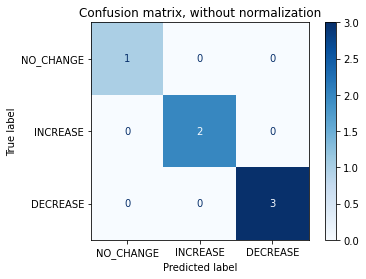

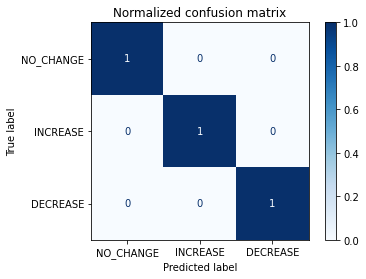

In [203]:
# Confusion Matrix

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

multilabel_confusion_matrix(Y_test_true, Y_test_predict, labels=[0, 1, 2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(neigh, X_test, Y_test_predict,
                                 display_labels=np.array(["NO_CHANGE", "INCREASE", "DECREASE"]),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)


    print(title)
    print(disp.confusion_matrix)


plt.show()
 








In [105]:
Y_test_true

[1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1]